## Interpolation Test Stimuli Performance V2

Two objectives:
- Training Data
- Model comparison
    - collapsed, and by individual

In [244]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from behav import plotting, utils, loading
from starling_rhythm.utils.analysis import stim_parser, plot_subject_acquisition, acquisition_data_preprocessing

from starling_rhythm.utils.paths import PROCESSED_DIR, FIGURE_DIR
import pandas as pd

import seaborn as sns
sns.set_style("ticks")

data_path = '/mnt/cube/RawData/Magpi/'

subjects = (
    ['B1520', 'B1535']
)

In [245]:
%%time
behav_data = loading.load_data_pandas(subjects, data_path)

CPU times: user 1.4 s, sys: 61.6 ms, total: 1.46 s
Wall time: 14.6 s


### Clean out debug trials before shaping and parse stim info

In [246]:
behav_data['B1520'] = behav_data['B1520'][behav_data['B1520'].index > '2023-01-19 00:00:00.000000'] 
## B1520 started trials on the 19th, previous are debug trials

behav_data['B1535'] = behav_data['B1535'][behav_data['B1535'].index > '2023-01-20 00:00:00.000000'] 
## B1535 started trials on the 20th, previous are debug trials

In [247]:
behav_data = stim_parser(behav_data)

Output stim labels for B1520: 109167it [00:11, 9684.11it/s] 
Output stim labels for B1535: 102808it [00:10, 10023.07it/s]


## Plot acquisition data

Plot accuracy (y) over time (x) for each stimuli

/home/AD/j8xing/starling_rhythm_mfdfa/starling_rhythm/utils/analysis.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[subj]['day'] = [
/home/AD/j8xing/starling_rhythm_mfdfa/starling_rhythm/utils/analysis.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[subj]['day'] = [


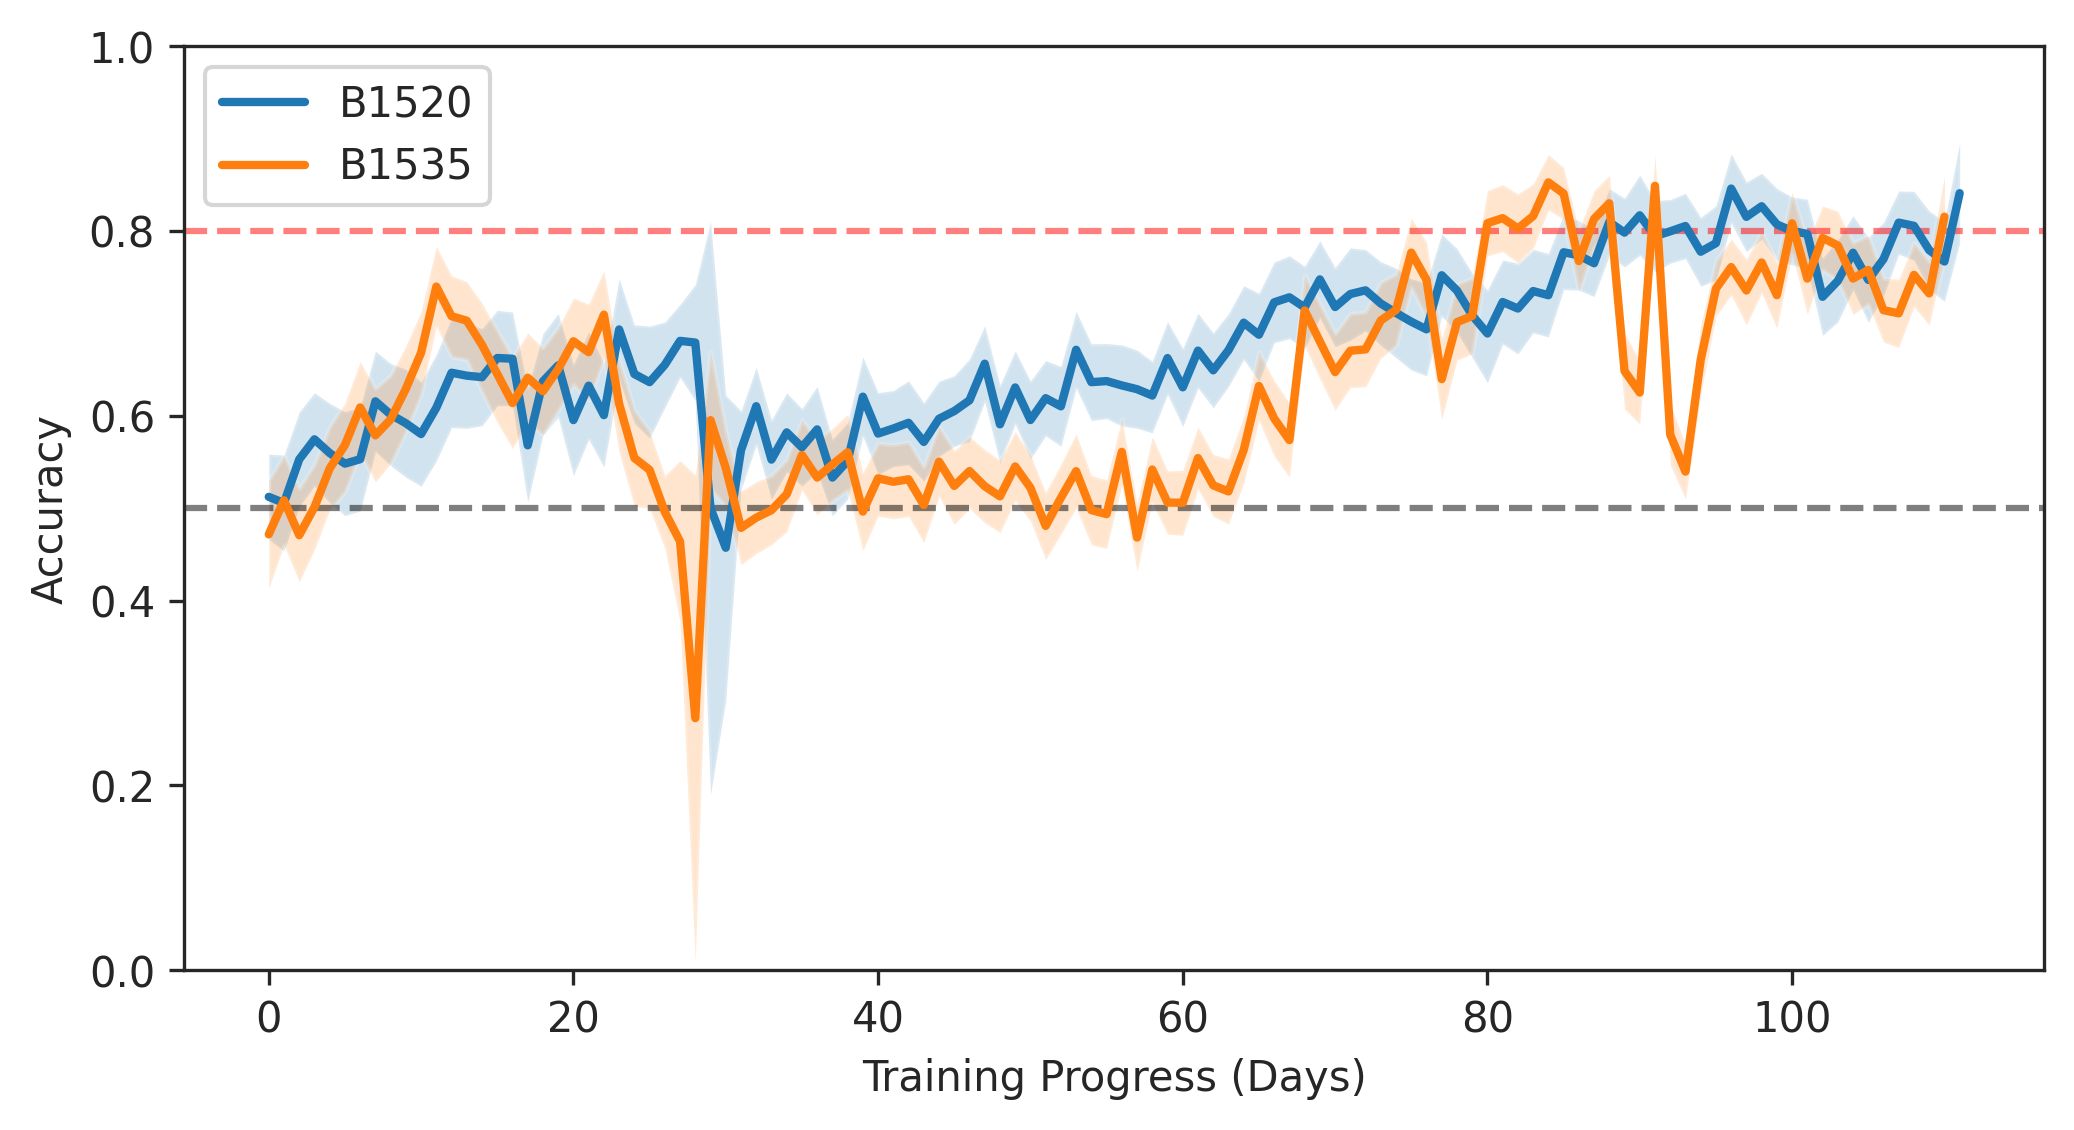

In [248]:
plot_subject_acquisition(behav_data)

plt.savefig(FIGURE_DIR / 'F4_A_acquisition.pdf', dpi = 'figure', format = 'pdf', transparent = True)

In [249]:
trainB1520 = behav_data['B1520'].reset_index()
trainB1535 = behav_data['B1535'].reset_index()

trainB1520['bID'] = 'B1520'
trainB1535['bID'] = 'B1535'

trainB1520 = trainB1520[trainB1520.type_ == 'normal']
trainB1535 = trainB1535[trainB1535.type_ == 'normal']

trainB1520 = trainB1520[trainB1520.time < test_data.loc['B1520'].time.values[0]]
trainB1535 = trainB1535[trainB1535.time < test_data.loc['B1535'].time.values[0]]

trainB1520 = trainB1520.iloc[-1000:]
trainB1535 = trainB1535.iloc[-1000:]

In [250]:
trainbystim = pd.concat([trainB1520, trainB1535])

In [251]:
trainbystim

,time,session,index,type_,stimulus,class_,response,correct,rt,reward,punish,data_file,stim_type,pair_indices,inter_nums,bID
83963,2023-04-17 10:39:05.887980,18,153,normal,/home/bird/opdat/B1520/stimuli/shuffleGap_1_mi...,R,right,True,0.422585,True,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,training,1,min,B1520
83964,2023-04-17 10:39:26.756053,18,154,normal,/home/bird/opdat/B1520/stimuli/shuffleGap_1_mi...,R,right,True,1.999342,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,training,1,min,B1520
83965,2023-04-17 10:39:45.866630,18,155,normal,/home/bird/opdat/B1520/stimuli/shuffleGap_0_ma...,L,left,True,0.172525,True,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,training,0,max,B1520
83966,2023-04-17 10:40:05.234029,18,156,normal,/home/bird/opdat/B1520/stimuli/shuffleGap_0_mi...,R,right,True,1.643698,True,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,training,0,min,B1520
83967,2023-04-17 10:40:26.243540,18,157,normal,/home/bird/opdat/B1520/stimuli/shuffleGap_1_mi...,R,right,True,1.237399,False,False,/mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...,training,1,min,B1520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81847,2023-04-20 12:38:26.747195,6,37,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_1_ma...,L,right,False,0.406465,False,True,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,1,max,B1535
81849,2023-04-20 12:40:45.081481,6,39,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_ma...,L,left,True,0.749882,True,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,max,B1535
81850,2023-04-20 12:41:05.943219,6,40,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_mi...,R,right,True,0.609306,True,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,min,B1535
81851,2023-04-20 12:41:26.362485,6,41,normal,/home/bird/opdat/B1535/stimuli/shuffleGap_0_ma...,L,left,True,1.280296,False,False,/mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...,training,0,max,B1535


In [252]:
groupby_list = ['bID', 'pair_indices', 'inter_nums']

In [253]:
trainbystim_data = pd.DataFrame(
    trainbystim.groupby(
        groupby_list
    )['correct'].agg(['mean', 'count'])
)

In [254]:
trainbystim_data

mean  count
bID   pair_indices inter_nums                 
B1520 0            max         0.917012    241
                   min         0.738197    233
      1            max         0.819328    238
                   min         0.738095    252
B1535 0            max         0.669421    242
                   min         0.842105    247
      1            max         0.585062    241
                   min         0.741036    251

In [255]:
from statsmodels.stats.proportion import proportion_confint

In [256]:
## calculate binomial CI
binomial_lower = []
binomial_upper = []

for i, row in trainbystim_data.iterrows():
    
    try:
        lower, upper = proportion_confint(int(row['mean'] * row['count']), row['count'], alpha = 0.05)
    except:
        lower = np.nan
        upper = np.nan
    
    binomial_lower.append(lower)
    binomial_upper.append(upper)
    
trainbystim_data['lower'] = binomial_lower
trainbystim_data['upper'] = binomial_upper

In [257]:
trainby_stim_data = trainbystim_data.reset_index()

In [258]:
B1520 = trainby_stim_data[trainby_stim_data['bID'] == 'B1520']
B1535 = trainby_stim_data[trainby_stim_data['bID'] == 'B1535']

In [1]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 3), dpi = 300, sharey = True)

for i, row in B1520.iterrows():

    axes[0].plot(row.pair_indices, row['mean'], marker = 'x')
    axes[0].errorbar(x = row.pair_indices, y = row['mean'], yerr = [[row.lower], [row.upper]], fmt = 'none')
    axes[0].set_ylim([0, 1])
    
for i, row in B1535.iterrows():

    axes[1].plot(row.pair_indices, row['mean'], marker = 'x')
    axes[1].fill_between(x = row.pair_indices, y1 = row.lower, y2 = row.upper)
    axes[1].set_ylim([0, 1])

NameError: name 'plt' is not defined

### For every test trial, only keep if the previous 100 trial accuracy is > 0.8

In [260]:
from starling_rhythm.utils.analysis import test_filter

In [261]:
test_data, training_data = test_filter(behav_data, accuracy_threshold = 0.8, past_baseline_trials = 100)

Iterating through test trials for subject B1520: 3971it [00:02, 1359.03it/s]
Iterating through test trials for subject B1535: 2997it [00:01, 1720.76it/s]


### Hypothesis Space

Hypothesis 1: Linear Interpolation 

Hypothesis 2: Multifractal

In [262]:
bID = "s_b1555_22"
SAVE_PATH = PROCESSED_DIR / bID / 'salvage_inter_tmf.pickle'
stims = pd.read_pickle(SAVE_PATH)

In [263]:
grouped_training_data = pd.concat(training_data)

In [264]:
baseline_accuracies = pd.DataFrame(
    grouped_training_data.groupby(
        ['inter_nums']
    )['response'].agg('value_counts', normalize = True)
)

baseline_accuracies = baseline_accuracies.rename(columns = {'response': 'prop'})

In [265]:
baseline_accuracies.loc[('max', 'right')].values[0]

0.11640926640926641

In [266]:
baseline_accuracies

prop
inter_nums response          
max        left      0.844981
           right     0.116409
           none      0.038610
min        right     0.714477
           left      0.236183
           none      0.049340

In [267]:
stims.groupby('interpolation_num')['mean_tMF'].agg('mean').iloc[-1]

23.525071394807533

In [268]:
mf_function = list(stims.groupby('interpolation_num')['mean_tMF'].agg('mean')[::4].values)

In [269]:
list(stims.groupby('interpolation_num')['mean_tMF'].agg('mean')[::4].index.values).append(127)

normalize(
    x = np.linspace(1, 0, 33), 
    normalize_anchors = (np.linspace(1, 0, 33)[0], np.linspace(1, 0, 33)[-1]), 
    newRange = (left_baseline, right_baseline)
)

In [270]:
mf_function.append(stims.groupby('interpolation_num')['mean_tMF'].agg('mean').iloc[-1])

In [271]:
def normalize(x, normalize_anchors, newRange=(0, 1)): #x is an array. Default range is between zero and one
    xmin, xmax = normalize_anchors #get max and min from input array
    norm = (x - xmin)/(xmax - xmin) # scale between zero and one
    
    if newRange == (0, 1):
        return(norm) # wanted range is the same as norm
    elif newRange != (0, 1):
        return norm * (newRange[1] - newRange[0]) + newRange[0] #scale to a different range.    
    #add other conditions here. For example, an error message

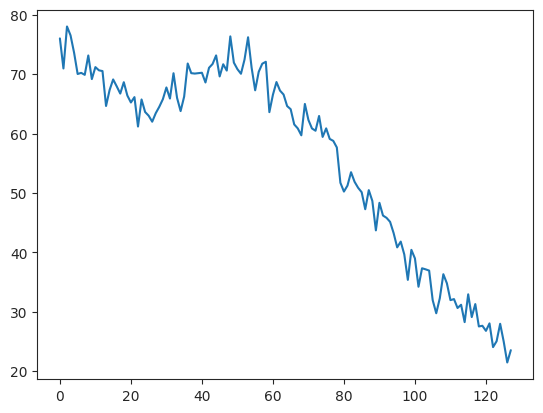

In [272]:
plt.plot(stims.groupby('interpolation_num')['mean_tMF'].agg('mean'))

In [273]:
what = pd.DataFrame({
    'mf' : hypo1_mf[0],
    'p' : hypo1_mf[1]
}).sort_values(by = 'mf')

In [274]:
baseline_accuracies

prop
inter_nums response          
max        left      0.844981
           right     0.116409
           none      0.038610
min        right     0.714477
           left      0.236183
           none      0.049340

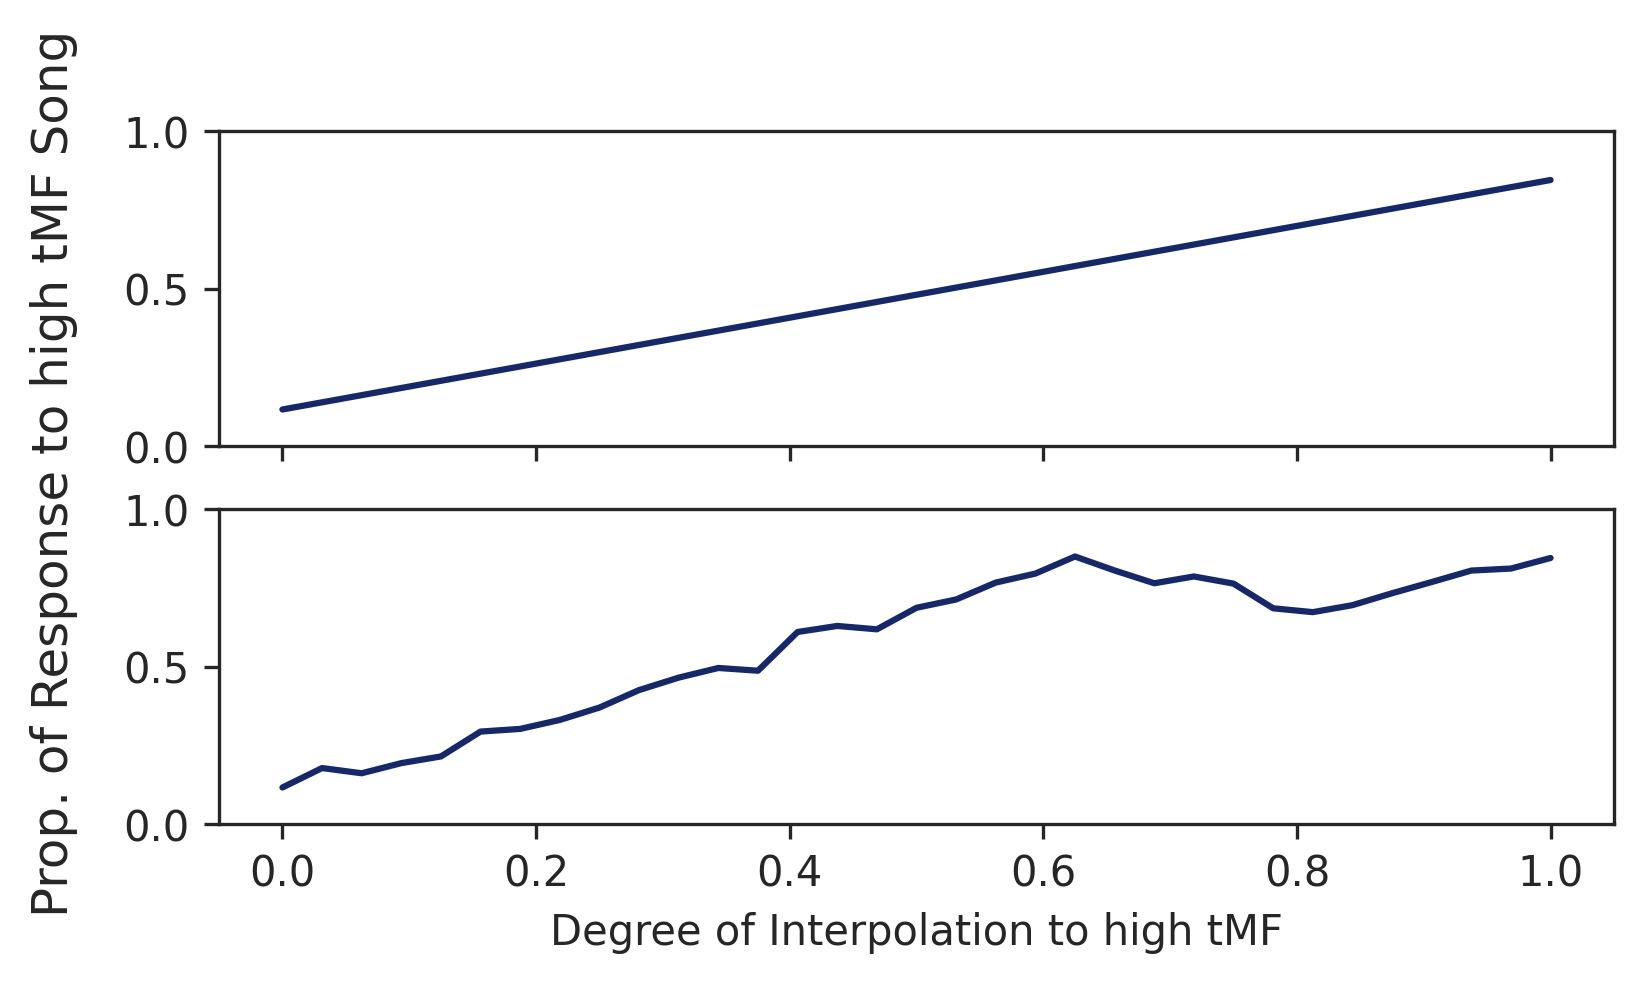

In [275]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = True, figsize = (6, 3), dpi = 300)

left_baseline = baseline_accuracies.loc[('max', 'left')].values[0]
right_baseline = baseline_accuracies.loc[('max', 'right')].values[0]


## Hypothesis 1
### From left baseline to right baseline, there is a linear relationship in the linear interpolation space
hypo1_linear = (
    np.linspace(1, 0, 33), 
    np.linspace(left_baseline, right_baseline, 33)
)

axes[0].plot(
    hypo1_linear[0], 
    hypo1_linear[1], color = '#172869'
)

#axes[0][1].plot(
#    what['mf'],
#    what['p']
#)

axes[1].set_xlabel('Degree of Interpolation to high tMF')
axes[1].set_ylim(0, 1)

## Hypothesis 2
### from left baseline to right baseline, there is a linear relationship in the multifractal space
hypo2_linear = (
    np.linspace(1, 0, 33),
    normalize(
        x = mf_function, 
        normalize_anchors = (mf_function[0], mf_function[-1]), 
        newRange = (left_baseline, right_baseline)
    )
)


axes[1].plot(
    hypo2_linear[0],
    hypo2_linear[1], color = '#172869'
)

fig.supylabel('Prop. of Response to high tMF Song')


plt.savefig(FIGURE_DIR / 'F3_D_hypotheses.pdf', dpi = 'figure', format = 'pdf', transparent = True)
## 

Text(0.02, 0.5, 'Prop. of Response to high TMF')

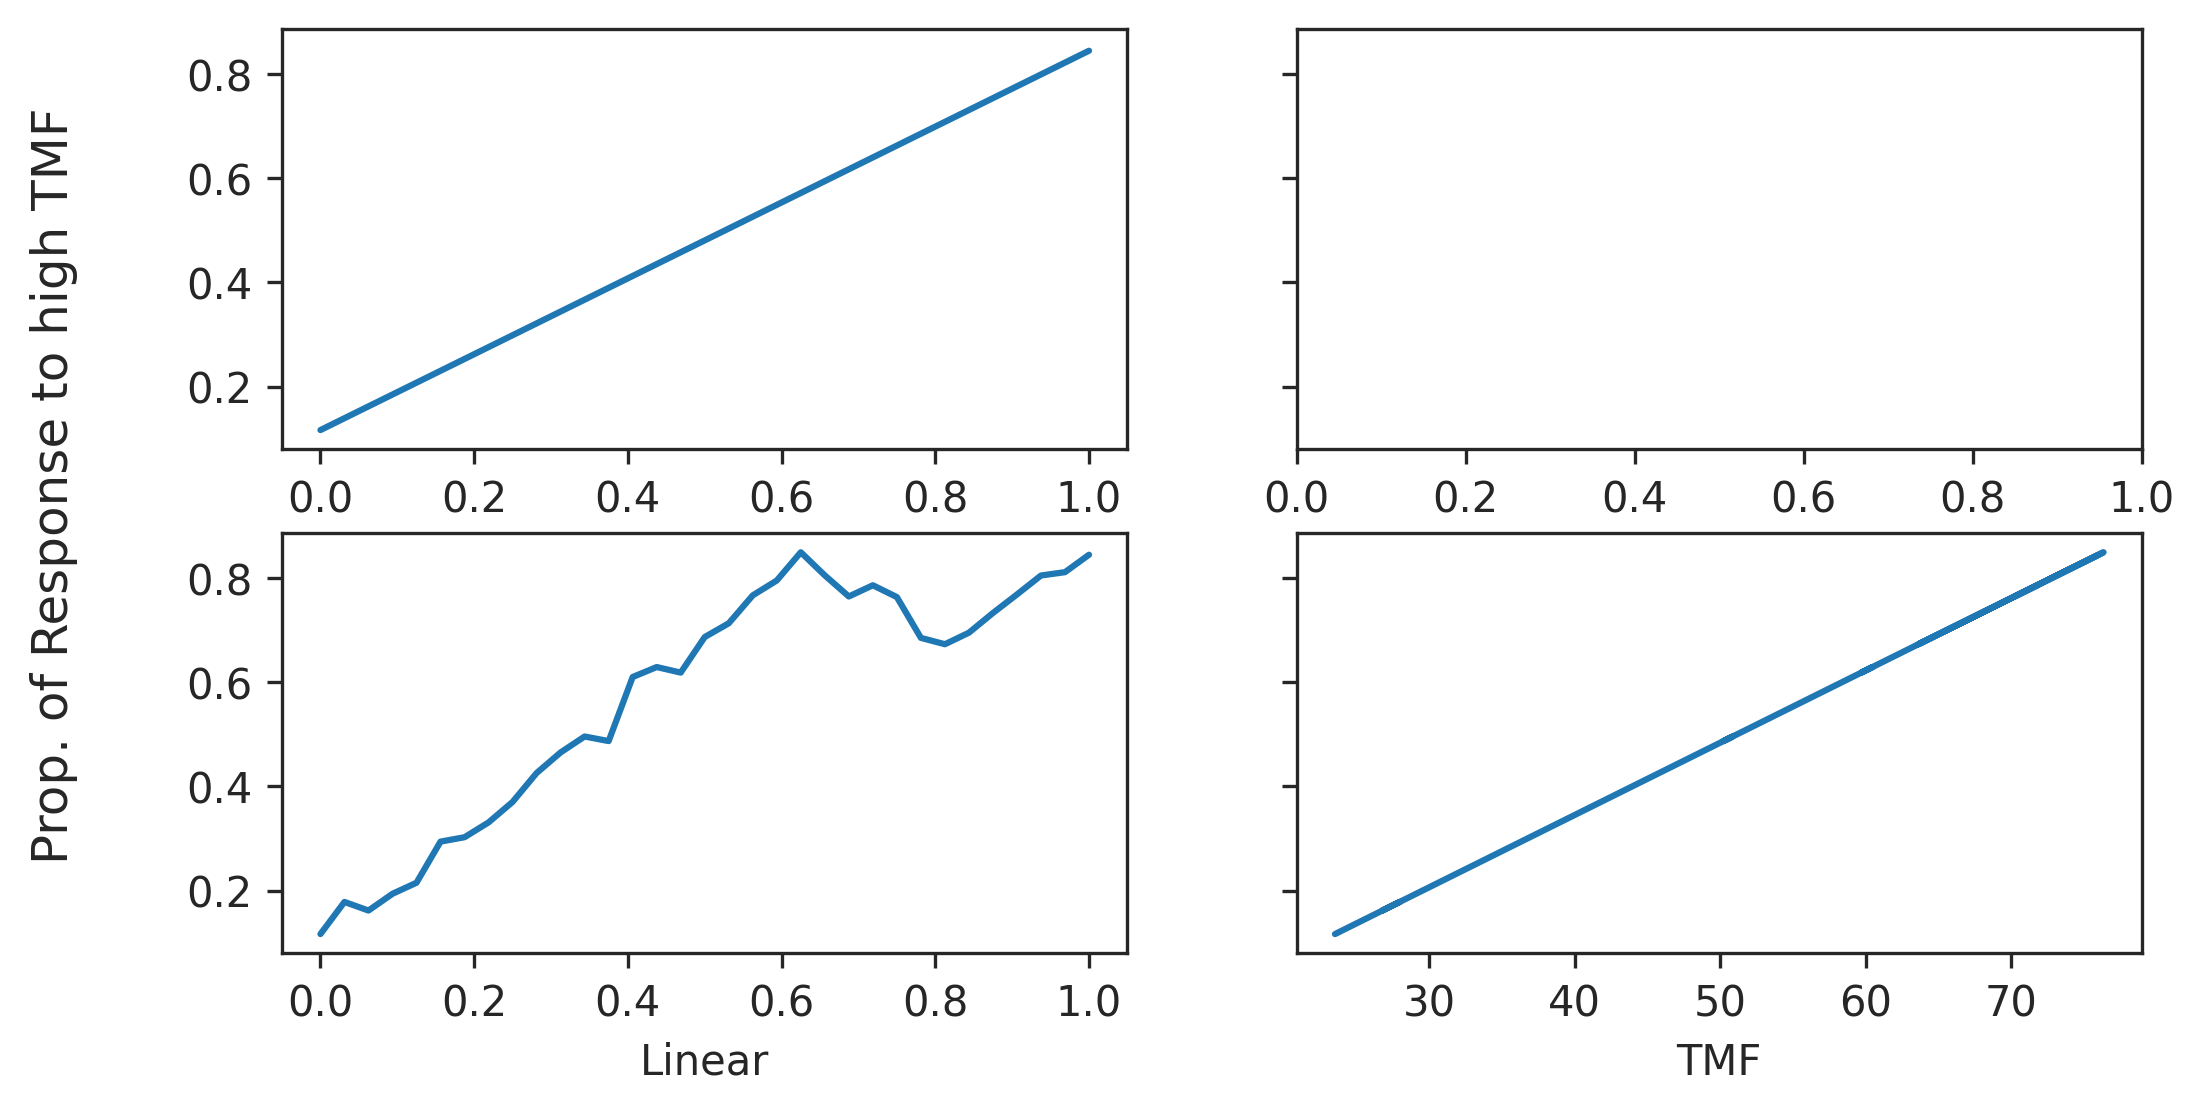

In [276]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, sharex = False, sharey = True, figsize = (8, 4), dpi = 300)

left_baseline = baseline_accuracies.loc[('max', 'left')].values[0]
right_baseline = baseline_accuracies.loc[('max', 'right')].values[0]


## Hypothesis 1
### From left baseline to right baseline, there is a linear relationship in the linear interpolation space
hypo1_linear = (
    np.linspace(1, 0, 33), 
    np.linspace(left_baseline, right_baseline, 33)
)

### From left baseline to right baseline, there is undefined relationship in the multifractal space
hypo1_mf = (
    mf_function,
    normalize(
        x = np.linspace(1, 0, 33), 
        normalize_anchors = (np.linspace(1, 0, 33)[0], np.linspace(1, 0, 33)[-1]), 
        newRange = (left_baseline, right_baseline)
    )
)

axes[0][0].plot(
    hypo1_linear[0], 
    hypo1_linear[1]
)

#axes[0][1].plot(
#    what['mf'],
#    what['p']
#)

axes[0][0].set_xlabel('Linear')
axes[0][1].set_xlabel('Linear')
axes[1][0].set_xlabel('Linear')
axes[1][1].set_xlabel('TMF')

## Hypothesis 2
### from left baseline to right baseline, there is a linear relationship in the multifractal space
hypo2_linear = (
    np.linspace(1, 0, 33),
    normalize(
        x = mf_function, 
        normalize_anchors = (mf_function[0], mf_function[-1]), 
        newRange = (left_baseline, right_baseline)
    )
)

### from left baseline to right baseline, there is an undefined relationship in the multifractal space
hypo2_mf = (
    mf_function,
    normalize(
        x = mf_function, 
        normalize_anchors = (mf_function[0], mf_function[-1]), 
        newRange = (left_baseline, right_baseline)
    )
)

axes[1][0].plot(
    hypo2_linear[0],
    hypo2_linear[1]
)

axes[1][1].plot(
    hypo2_mf[0],
    hypo2_mf[1]
)

fig.supylabel('Prop. of Response to high TMF')

## 

In [277]:
## plot

In [278]:
test_data = pd.concat(test_data)

In [279]:
test_data

time session index type_  \
B1520 86177  2023-04-19 12:46:10.018781       1   129  test   
      86207  2023-04-19 13:21:46.445657       1    15  test   
      86209  2023-04-19 13:22:22.555339       1    17  test   
      86218  2023-04-19 13:32:58.822093       1    26  test   
      86221  2023-04-19 13:35:31.927146       1    29  test   
...                                 ...     ...   ...   ...   
B1535 102717 2023-05-10 12:24:26.786492       8    93  test   
      102718 2023-05-10 12:24:43.101234       8    94  test   
      102721 2023-05-10 12:26:30.373777       8    97  test   
      102725 2023-05-10 12:28:47.871310       8   101  test   
      102731 2023-05-10 12:38:41.212502       8   107  test   

                                                       stimulus class_  \
B1520 86177   /home/bird/opdat/B1520/salv_interpolate/shuffl...      L   
      86207   /home/bird/opdat/B1520/salv_interpolate/shuffl...      L   
      86209   /home/bird/opdat/B1520/salv_interpolate/shuffl...      R   
      86218   /home/bird/opdat/B1520/salv_interpolate/shuffl...      R   
      86221   /home/bird/opdat/B1520/salv_interpolate/shuffl...      R   
...                                                         ...    ...   
B1535 102717  /home/bird/opdat/B1535/salv_interpolate/shuffl...      R   
      102718  /home/bird/opdat/B1535/salv_interpolate/shuffl...      R   
      102721  /home/bird/opdat/B1535/salv_interpolate/shuffl...      L   
      102725  /home/bird/opdat/B1535/salv_interpolate/shuffl...      L   
      102731  /home/bird/opdat/B1535/salv_interpolate/shuffl...      R   

             response correct        rt  reward punish  \
B1520 86177      left    True  0.203984   False  False   
      86207      left    True  0.219528   False  False   
      86209      left   False  0.235141   False  False   
      86218      left   False  3.514493   False  False   
      86221      left   False  0.204056   False  False   
...               ...     ...       ...     ...    ...   
B1535 102717    right    True  0.782130   False  False   
      102718    right    True  0.406972   False  False   
      102721    right   False  0.515399   False  False   
      102725    right   False  0.967883   False  False   
      102731    right    True  0.845230   False  False   

                                                      data_file stim_type  \
B1520 86177   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
      86207   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
      86209   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
      86218   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
      86221   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
...                                                         ...       ...   
B1535 102717  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   
      102718  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   
      102721  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   
      102725  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   
      102731  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   

             pair_indices inter_nums  
B1520 86177             1         20  
      86207             1         28  
      86209             1         76  
      86218             1        116  
      86221             0         72  
...                   ...        ...  
B1535 102717            0         92  
      102718            1         96  
      102721            1         56  
      102725            1         28  
      102731            1        127  

[2418 rows x 15 columns]

In [280]:
PMFX = pd.DataFrame(test_data.groupby(
    'inter_nums'
)['response'].agg('value_counts', normalize = True))
PMFX = PMFX.rename(columns = {'response': 'prop'})

In [281]:
PMFX

prop
inter_nums response          
0          left      0.859155
           right     0.112676
           none      0.028169
4          left      0.857143
           right     0.090909
...                       ...
124        right     0.684211
           left      0.276316
           none      0.039474
127        right     0.600000
           left      0.400000

[97 rows x 1 columns]

In [282]:
PMFX = PMFX.reset_index()

In [345]:
PMFX

,inter_nums,response,prop
0,0,left,0.859155
1,0,right,0.112676
2,0,none,0.028169
3,4,left,0.857143
4,4,right,0.090909
...,...,...,...
92,124,right,0.684211
93,124,left,0.276316
94,124,none,0.039474
95,127,right,0.600000


In [287]:
#PMFX[PMFX.response == 'left']

In [288]:
PMFX_L = PMFX[PMFX.response == 'left'].drop([0, 96])
PMFX_L.loc[0] = {
    'inter_nums': 0, 
    'response': 'left',
    'prop': left_baseline
}
PMFX_L.loc[127] = {
    'inter_nums': 127, 
    'response': 'left',
    'prop': right_baseline
}

In [289]:
PMFX_L = PMFX_L.reset_index(drop = True)

In [290]:
PMFX_L['rank'] = PMFX_L['inter_nums'].rank(ascending = False)
PMFX_L = PMFX_L.sort_values(by = 'rank')
PMFX_L['inter_degree'] = np.linspace(0, 1, 33)

In [291]:
PMFX_L.reset_index(drop = True)

,inter_nums,response,prop,rank,inter_degree
0,127,left,0.116409,1.0,0.00000
1,124,left,0.276316,2.0,0.03125
2,120,left,0.297297,3.0,0.06250
3,116,left,0.342105,4.0,0.09375
4,112,left,0.225352,5.0,0.12500
5,108,left,0.381579,6.0,0.15625
6,104,left,0.278689,7.0,0.18750
7,100,left,0.243590,8.0,0.21875
8,96,left,0.341772,9.0,0.25000
9,92,left,0.227848,10.0,0.28125


go back and listen to the test stimuli

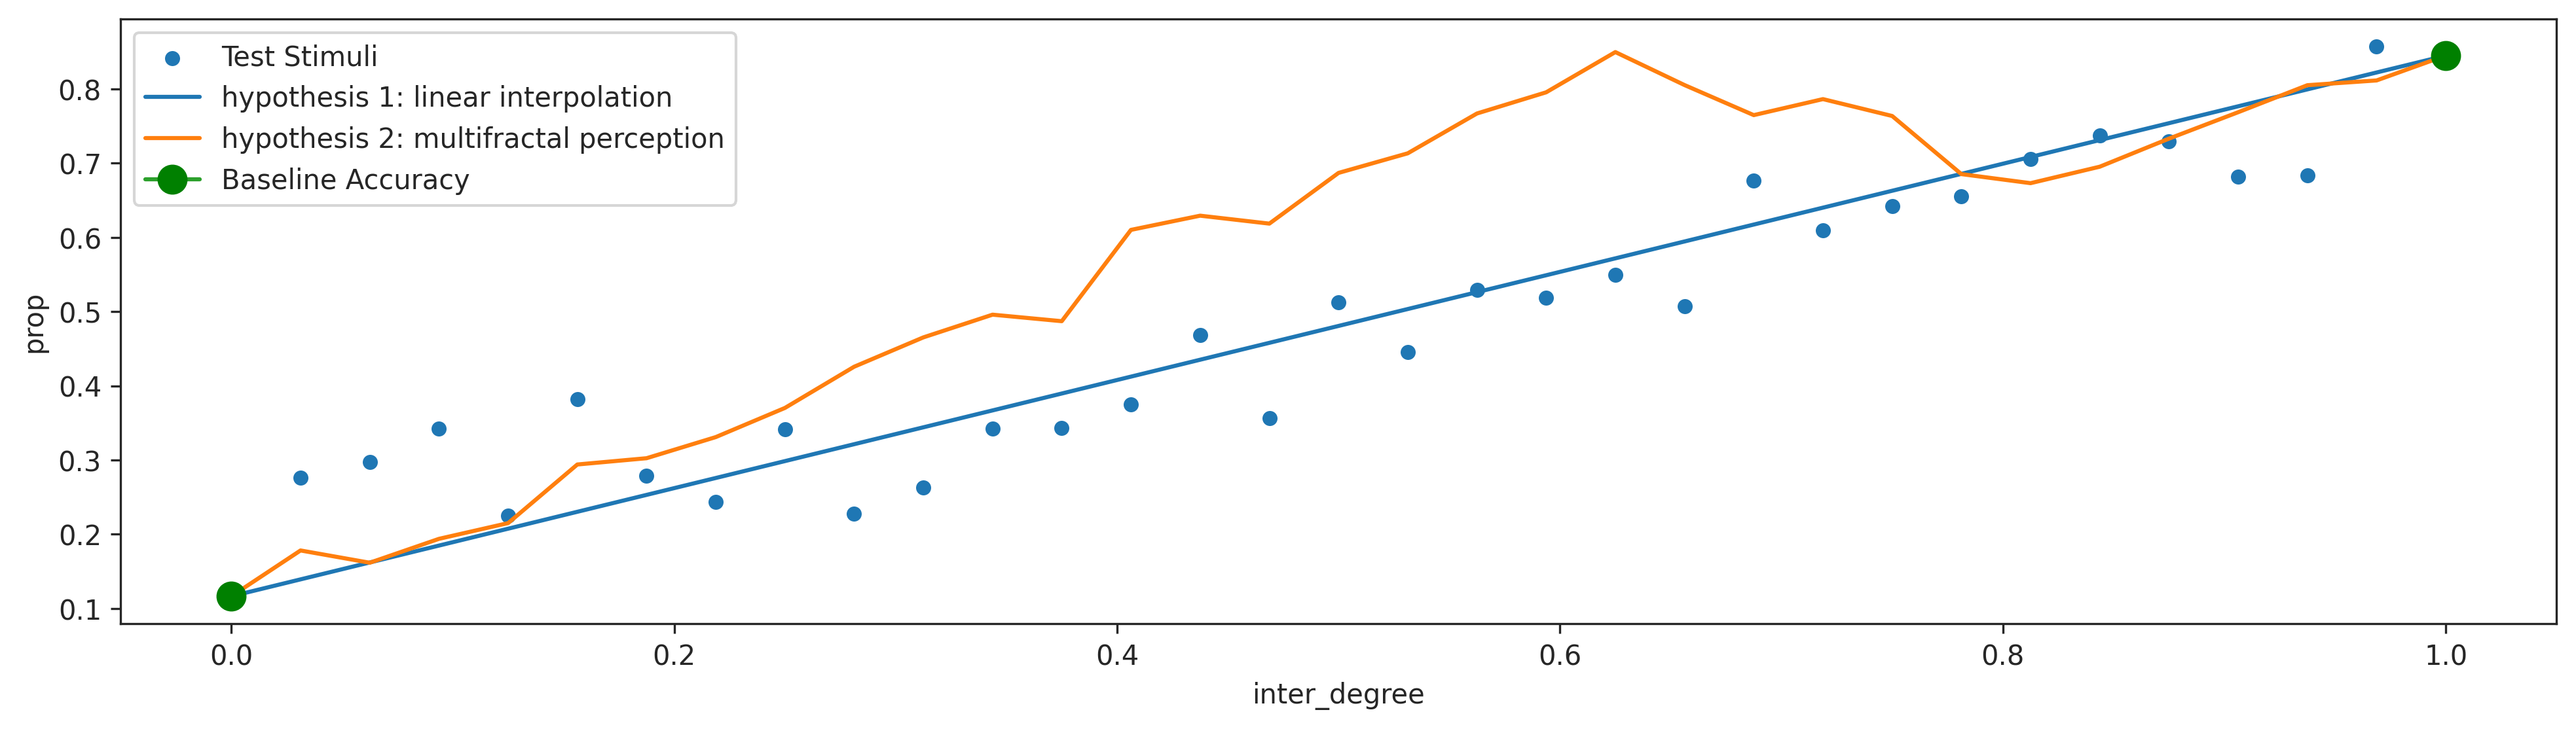

In [292]:
plt.figure(figsize = (16, 4), dpi = 300)
sns.scatterplot(
    data = PMFX_L,
    x = 'inter_degree',
    y = 'prop',
    label = 'Test Stimuli'
)

plt.plot(
    hypo1_linear[0],
    hypo1_linear[1],
    label = 'hypothesis 1: linear interpolation'
)

plt.plot(
    hypo2_linear[0],
    hypo2_linear[1],
    label = 'hypothesis 2: multifractal perception'
)

plt.plot(1, left_baseline, marker = 'o', markerfacecolor = 'green', markeredgecolor = 'green', markersize = 10, label = 'Baseline Accuracy')
plt.plot(0, right_baseline, marker = 'o', markerfacecolor = 'green', markeredgecolor = 'green', markersize = 10)

plt.legend()

In [293]:
hypo1_linear[0]

array([1.     , 0.96875, 0.9375 , 0.90625, 0.875  , 0.84375, 0.8125 ,
       0.78125, 0.75   , 0.71875, 0.6875 , 0.65625, 0.625  , 0.59375,
       0.5625 , 0.53125, 0.5    , 0.46875, 0.4375 , 0.40625, 0.375  ,
       0.34375, 0.3125 , 0.28125, 0.25   , 0.21875, 0.1875 , 0.15625,
       0.125  , 0.09375, 0.0625 , 0.03125, 0.     ])

In [294]:
np.flip(hypo2_linear[1])

array([0.11640927, 0.17813962, 0.16160024, 0.19378008, 0.21501811,
       0.29398977, 0.30243032, 0.3309026 , 0.37020295, 0.42571883,
       0.46525981, 0.49586932, 0.48708542, 0.6101198 , 0.62926755,
       0.61856616, 0.68690436, 0.71331212, 0.76696408, 0.7955098 ,
       0.84973029, 0.80526352, 0.76477225, 0.78634705, 0.76360316,
       0.68528613, 0.6730777 , 0.69527002, 0.73308512, 0.76868523,
       0.8050895 , 0.81150369, 0.84498069])

In [295]:
PMFX_L['linear_pred'] = np.flip(hypo1_linear[1])

In [296]:
PMFX_L['mf_pred'] = np.flip(hypo2_linear[1])

In [297]:
PMFX_L

,inter_nums,response,prop,rank,inter_degree,linear_pred,mf_pred
32,127,left,0.116409,1.0,0.00000,0.116409,0.116409
30,124,left,0.276316,2.0,0.03125,0.139177,0.178140
29,120,left,0.297297,3.0,0.06250,0.161945,0.161600
28,116,left,0.342105,4.0,0.09375,0.184713,0.193780
27,112,left,0.225352,5.0,0.12500,0.207481,0.215018
26,108,left,0.381579,6.0,0.15625,0.230249,0.293990
25,104,left,0.278689,7.0,0.18750,0.253016,0.302430
24,100,left,0.243590,8.0,0.21875,0.275784,0.330903
23,96,left,0.341772,9.0,0.25000,0.298552,0.370203
22,92,left,0.227848,10.0,0.28125,0.321320,0.425719


## calculate R^2

In [298]:
from sklearn.metrics import r2_score

In [299]:
r2_score(PMFX_L['prop'], PMFX_L['linear_pred'])

0.869588761290053

In [300]:
r2_score(PMFX_L['prop'], PMFX_L['mf_pred'])

0.33082265629073115

## chi square

In [319]:
import scipy.stats

In [326]:
CHI_count = pd.DataFrame(test_data.groupby(
    ['inter_nums']
)['response'].agg(
    total = 'count'
)).reset_index()

In [329]:
CHI_count

,inter_nums,total
0,0,71
1,4,77
2,8,60
3,12,88
4,16,74
5,20,80
6,24,68
7,28,90
8,32,67
9,36,87


In [330]:
pd.DataFrame(grouped_training_data.groupby(
        ['inter_nums']
    )['response'].agg('count'))

,response
inter_nums,
max,5180
min,5229


In [331]:
grouped_training_data.groupby(
    'inter_nums'
)['response'].agg('count')

inter_nums
max    5180
min    5229
Name: response, dtype: int64

In [340]:
CHI_count = CHI_count.sort_values(by = 'inter_nums', ascending = False)

In [341]:
linear_exp = (PMFX_L['linear_pred'].values * CHI_count['total']).values[1:-1]
linear_exp = linear_exp * (sum((PMFX_L['prop'].values[1:-1] * CHI_count['total'][1:-1]).astype(int))/ sum(linear_exp))
linear_exp

array([10.47037385, 11.86260179, 13.89605144, 14.58198956, 17.32172902,
       15.27774522, 21.29339099, 23.34683403, 25.12728488, 27.24833998,
       26.50933696, 25.84048997, 29.39157412, 27.56823423, 39.43631807,
       38.06626919, 45.849646  , 35.42140875, 44.01867421, 40.18442202,
       42.9616043 , 41.55156864, 55.12231543, 43.96052139, 61.07980838,
       47.68172852, 57.8991394 , 55.22446804, 67.65562739, 47.48107801,
       62.66942625])

In [342]:
mf_exp = (PMFX_L['mf_pred'].values * CHI_count['total']).values[1:-1]
mf_exp = mf_exp * (sum((PMFX_L['prop'].values[1:-1] * CHI_count['total'][1:-1]).astype(int))/ sum(mf_exp))

In [343]:
scipy.stats.chisquare(
    f_obs = (PMFX_L['prop'].values * CHI_count['total']).astype(int)[1:-1],
    f_exp = linear_exp
)

Power_divergenceResult(statistic=49.45811434917936, pvalue=0.01410927664924617)

In [344]:
scipy.stats.chisquare(
    f_obs = (PMFX_L['prop'].values * CHI_count['total']).astype(int)[1:-1],
    f_exp = mf_exp
)

Power_divergenceResult(statistic=88.29766808175758, pvalue=1.1869318544393644e-07)

## Reaction time?

In [346]:
test_rt = pd.DataFrame(test_data.groupby(
    ['correct', 'inter_nums', 'pair_indices']
)['rt'].agg('mean'))

In [347]:
test_rt

rt
correct inter_nums pair_indices          
False   0          0             0.874103
                   1             1.264798
        4          0             3.332871
                   1             1.001013
        8          0             1.651387
...                                   ...
True    120        1             1.103386
        124        0             0.947409
                   1             1.344230
        127        0             0.533043
                   1             0.446283

[132 rows x 1 columns]

<AxesSubplot:xlabel='inter_nums', ylabel='rt'>

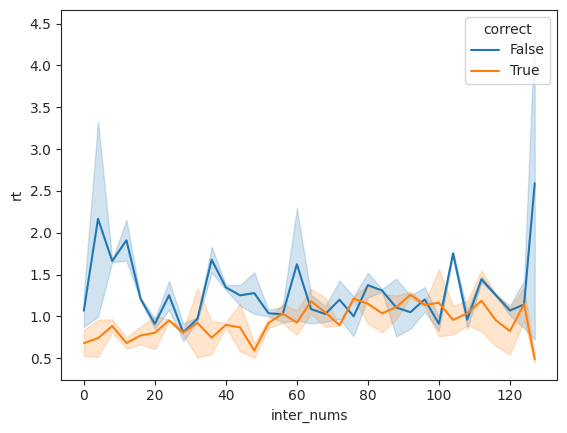

In [348]:
sns.lineplot(data = test_rt, x = 'inter_nums', y = 'rt', hue = 'correct')

In [349]:
## by subject?
test_1520 = pd.DataFrame(test_data.loc['B1520'].groupby(
    ['correct', 'inter_nums', 'pair_indices']
)['rt'].agg('mean'))

<AxesSubplot:xlabel='inter_nums', ylabel='rt'>

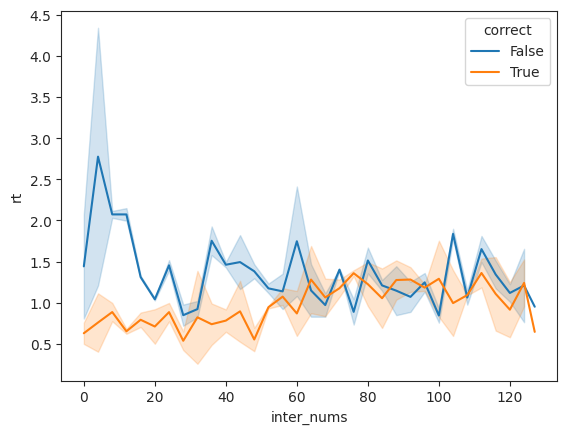

In [350]:
sns.lineplot(data = test_1520, x = 'inter_nums', y = 'rt', hue = 'correct')

In [351]:
## by subject?
test_1535 = pd.DataFrame(test_data.loc['B1535'].groupby(
    ['correct', 'inter_nums', 'pair_indices']
)['rt'].agg('mean'))

<AxesSubplot:xlabel='inter_nums', ylabel='rt'>

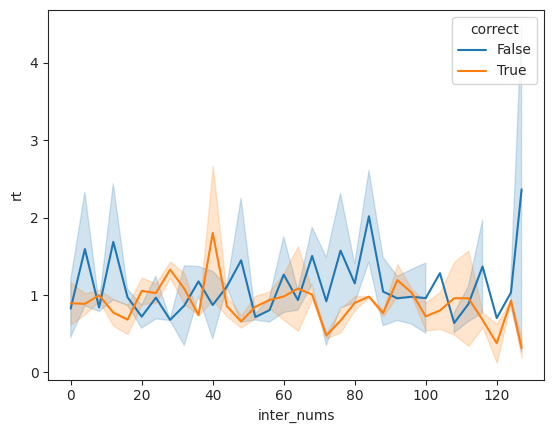

In [352]:
sns.lineplot(data = test_1535, x = 'inter_nums', y = 'rt', hue = 'correct')

## Let's divide by stimuli

In [360]:
test_data

time session index type_  \
B1520 86177  2023-04-19 12:46:10.018781       1   129  test   
      86207  2023-04-19 13:21:46.445657       1    15  test   
      86209  2023-04-19 13:22:22.555339       1    17  test   
      86218  2023-04-19 13:32:58.822093       1    26  test   
      86221  2023-04-19 13:35:31.927146       1    29  test   
...                                 ...     ...   ...   ...   
B1535 102717 2023-05-10 12:24:26.786492       8    93  test   
      102718 2023-05-10 12:24:43.101234       8    94  test   
      102721 2023-05-10 12:26:30.373777       8    97  test   
      102725 2023-05-10 12:28:47.871310       8   101  test   
      102731 2023-05-10 12:38:41.212502       8   107  test   

                                                       stimulus class_  \
B1520 86177   /home/bird/opdat/B1520/salv_interpolate/shuffl...      L   
      86207   /home/bird/opdat/B1520/salv_interpolate/shuffl...      L   
      86209   /home/bird/opdat/B1520/salv_interpolate/shuffl...      R   
      86218   /home/bird/opdat/B1520/salv_interpolate/shuffl...      R   
      86221   /home/bird/opdat/B1520/salv_interpolate/shuffl...      R   
...                                                         ...    ...   
B1535 102717  /home/bird/opdat/B1535/salv_interpolate/shuffl...      R   
      102718  /home/bird/opdat/B1535/salv_interpolate/shuffl...      R   
      102721  /home/bird/opdat/B1535/salv_interpolate/shuffl...      L   
      102725  /home/bird/opdat/B1535/salv_interpolate/shuffl...      L   
      102731  /home/bird/opdat/B1535/salv_interpolate/shuffl...      R   

             response correct        rt  reward punish  \
B1520 86177      left    True  0.203984   False  False   
      86207      left    True  0.219528   False  False   
      86209      left   False  0.235141   False  False   
      86218      left   False  3.514493   False  False   
      86221      left   False  0.204056   False  False   
...               ...     ...       ...     ...    ...   
B1535 102717    right    True  0.782130   False  False   
      102718    right    True  0.406972   False  False   
      102721    right   False  0.515399   False  False   
      102725    right   False  0.967883   False  False   
      102731    right    True  0.845230   False  False   

                                                      data_file stim_type  \
B1520 86177   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
      86207   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
      86209   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
      86218   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
      86221   /mnt/cube/RawData/Magpi/B1520/B1520_trialdata_...     INTER   
...                                                         ...       ...   
B1535 102717  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   
      102718  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   
      102721  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   
      102725  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   
      102731  /mnt/cube/RawData/Magpi/B1535/B1535_trialdata_...     INTER   

             pair_indices inter_nums  
B1520 86177             1         20  
      86207             1         28  
      86209             1         76  
      86218             1        116  
      86221             0         72  
...                   ...        ...  
B1535 102717            0         92  
      102718            1         96  
      102721            1         56  
      102725            1         28  
      102731            1        127  

[2418 rows x 15 columns]

In [363]:
PMFX_stim = pd.DataFrame(test_data.groupby(
    ['pair_indices', 'inter_nums']
)['response'].agg('value_counts', normalize = True))
PMFX_stim = PMFX_stim.rename(columns = {'response': 'prop'})

In [369]:
PMFX_stim = PMFX_stim.reset_index()

In [370]:
PMFX_stim_L = PMFX_stim[PMFX_stim.response == 'left']

In [381]:
PMFX_stim_L_0 = PMFX_stim_L[PMFX_stim_L.pair_indices == '0']
PMFX_stim_L_1 = PMFX_stim_L[PMFX_stim_L.pair_indices == '1']

In [384]:
PMFX_stim_L_0['rank'] = PMFX_stim_L_0['inter_nums'].rank(ascending = False)
PMFX_stim_L_0 = PMFX_stim_L_0.sort_values(by = 'rank')
PMFX_stim_L_0['inter_degree'] = np.linspace(0, 1, 33)

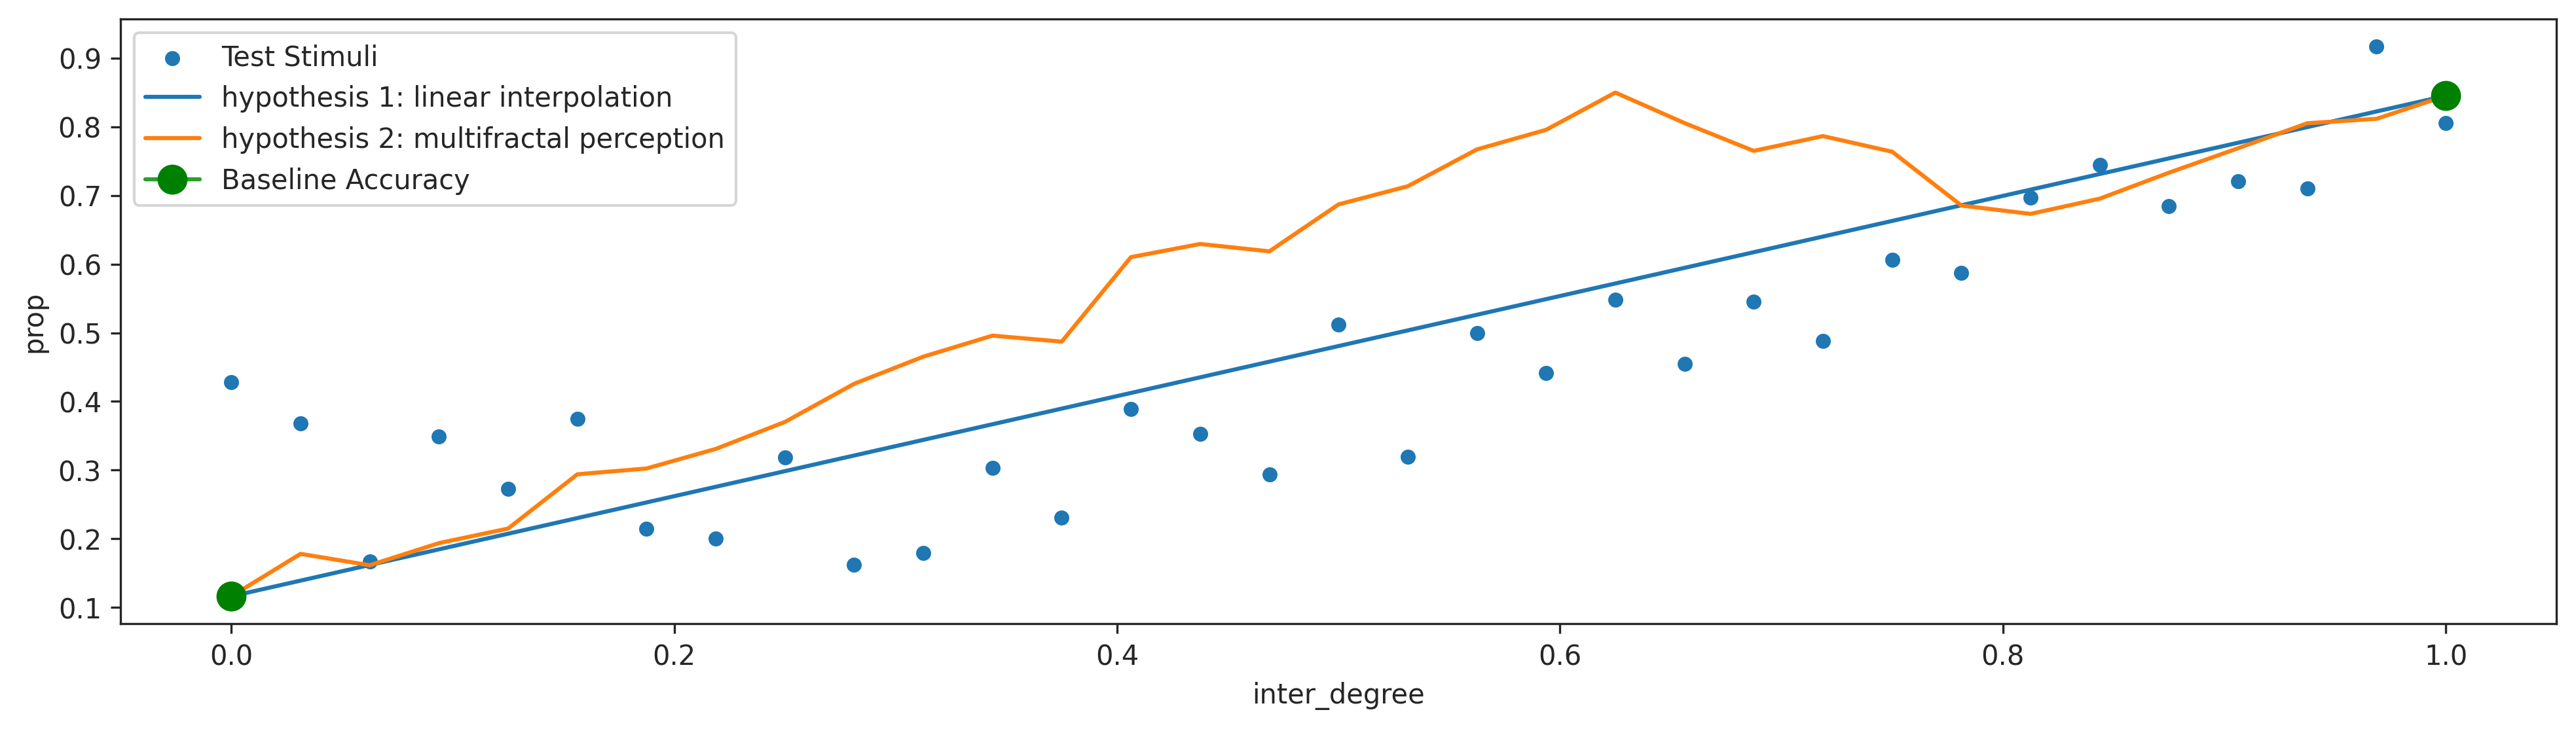

In [388]:
plt.figure(figsize = (16, 4), dpi = 300)
sns.scatterplot(
    data = PMFX_stim_L_0,
    x = 'inter_degree',
    y = 'prop',
    label = 'Test Stimuli'
)

plt.plot(
    hypo1_linear[0],
    hypo1_linear[1],
    label = 'hypothesis 1: linear interpolation'
)

plt.plot(
    hypo2_linear[0],
    hypo2_linear[1],
    label = 'hypothesis 2: multifractal perception'
)

plt.plot(1, left_baseline, marker = 'o', markerfacecolor = 'green', markeredgecolor = 'green', markersize = 10, label = 'Baseline Accuracy')
plt.plot(0, right_baseline, marker = 'o', markerfacecolor = 'green', markeredgecolor = 'green', markersize = 10)

plt.legend()

In [385]:
PMFX_stim_L_1['rank'] = PMFX_stim_L_1['inter_nums'].rank(ascending = False)
PMFX_stim_L_1 = PMFX_stim_L_1.sort_values(by = 'rank')
PMFX_stim_L_1['inter_degree'] = np.linspace(0, 1, 33)

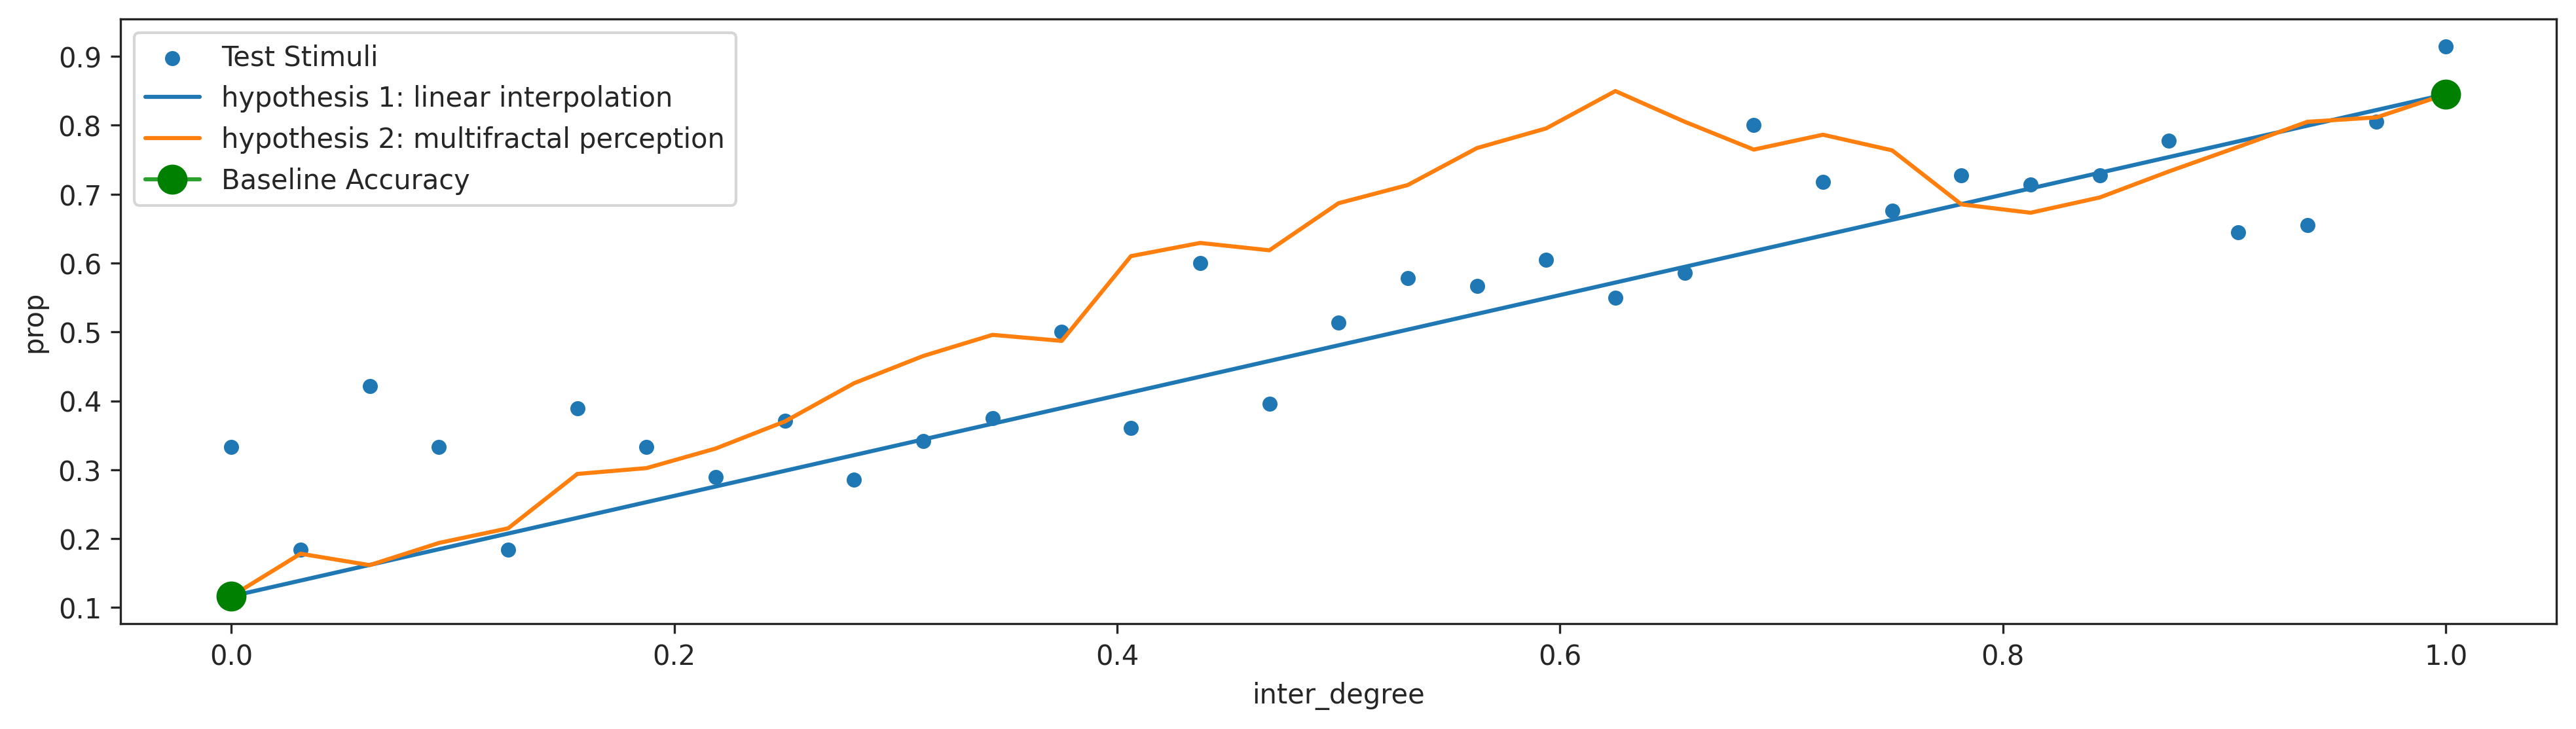

In [389]:
plt.figure(figsize = (16, 4), dpi = 300)
sns.scatterplot(
    data = PMFX_stim_L_1,
    x = 'inter_degree',
    y = 'prop',
    label = 'Test Stimuli'
)

plt.plot(
    hypo1_linear[0],
    hypo1_linear[1],
    label = 'hypothesis 1: linear interpolation'
)

plt.plot(
    hypo2_linear[0],
    hypo2_linear[1],
    label = 'hypothesis 2: multifractal perception'
)

plt.plot(1, left_baseline, marker = 'o', markerfacecolor = 'green', markeredgecolor = 'green', markersize = 10, label = 'Baseline Accuracy')
plt.plot(0, right_baseline, marker = 'o', markerfacecolor = 'green', markeredgecolor = 'green', markersize = 10)

plt.legend()